# ADSSE Flocking Simulation
This notebook will implement and display a simple boid flocking simulation.

The flocking behaviour is generated by three basic rules:
* Collision Avoidance
    * Attempt to move away from nearby flockmates to avoid collisions
* Velocity Matching
    * Attempt to move in the same direction at the same speed as nearby flockmates
* Flock Centering
    * Attempt to stay close to nearby flockmates

## Setup basic Boids environment

In [1]:
import numpy as np

In [2]:
limits = np.array([2000, 2000])

boid_count = 100

start_position_lower_limit = np.array([100, 200])
start_position_upper_limit = np.array([900, 1100])

start_velocity_lower_limit = np.array([0, -20])
start_velocity_upper_limit = np.array([10, 20])

In [3]:
def get_random_vectors_within_limits(count, lower_limits, upper_limits):
    width = upper_limits - lower_limits
    return (lower_limits[:, np.newaxis] + np.random.rand(2, count) * width[:, np.newaxis])

# Matplotlib Animations

In [4]:
from matplotlib import animation
from matplotlib import pyplot as plt
%matplotlib inline

## Starting Position

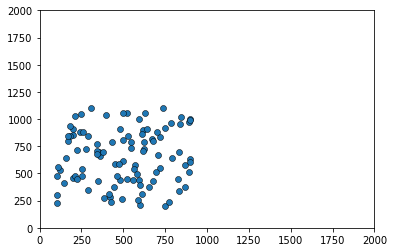

In [5]:
# create a simple plot
# initial x position in [100, 200], initial y position in [900, 1100]
# initial x velocity in [0, 10], initial y velocity in [-20, 20]
positions = get_random_vectors_within_limits(
    boid_count,
    start_position_lower_limit, 
    start_position_upper_limit)

velocities = get_random_vectors_within_limits(
    boid_count, 
    start_velocity_lower_limit, 
    start_velocity_upper_limit)

figure = plt.figure()
axes = plt.axes(xlim=(0, limits[0]), ylim=(0, limits[1]))
scatter = axes.scatter(positions[0, :], positions[1, :],
                       marker='o', edgecolor='k', lw=0.5)
scatter

## Flying Forward

In [6]:
def update_boids(positions, velocities):
    positions += velocities


def animate(frame):
    update_boids(positions, velocities)
    scatter.set_offsets(positions.transpose())

In [7]:
anim = animation.FuncAnimation(figure, animate,
                               frames=50, interval=50)

In [8]:
from IPython.display import HTML
HTML(anim.to_jshtml())

## Cohesion: Flying towards the middle

Reset initial positions and velocities

In [9]:
positions = get_random_vectors_within_limits(
    boid_count,
    start_position_lower_limit, 
    start_position_upper_limit)

velocities = get_random_vectors_within_limits(
    boid_count, 
    start_velocity_lower_limit, 
    start_velocity_upper_limit)

Find the center of mass of the flock. We will assume that each boid has the same mass, therefore the CoM is simply the mean position. 

The direcction from each boid to the centre of mass is `position - centre_of_mass`. Each boid will move in this direction modified by a `cohesion_strength` value

Update definition of our `update_boids` function to include this new behaviour

In [10]:
def update_boids(positions, velocities):
    cohesion_strength = 0.1
    centre_of_mass = np.mean(positions, 1)
    steering_cohesion = positions - centre_of_mass[:, np.newaxis]
    velocities -= steering_cohesion * cohesion_strength
    positions += velocities

In [11]:
def animate(frame):
    update_boids(positions, velocities)
    scatter.set_offsets(positions.transpose())
    
anim = animation.FuncAnimation(figure, animate,
                               frames=50, interval=50)

positions = get_random_vectors_within_limits(100, np.array([100, 900]), np.array([200, 1100]))
velocities = get_random_vectors_within_limits(100, np.array([0, -20]), np.array([10, 20]))


In [12]:
HTML(anim.to_jshtml())

## Avoiding Collisions

In [13]:

def update_boids(positions, velocities):
    cohesion_strength = 0.01
    centre_of_mass = np.mean(positions, 1)
    steering_cohesion = positions - centre_of_mass[:, np.newaxis]
    velocities -= steering_cohesion * cohesion_strength
    positions += velocities

    separations = positions[:, np.newaxis, :] - positions[:, :, np.newaxis]
    squared_displacements = separations * separations
    square_distances = np.sum(squared_displacements, 0)
    alert_distance = 100
    far_away = square_distances > alert_distance
    separations_if_close = np.copy(separations)
    separations_if_close[0, :, :][far_away] = 0
    separations_if_close[1, :, :][far_away] = 0
    velocities += np.sum(separations_if_close, 1)

    positions += velocities


In [14]:
def animate(frame):
    update_boids(positions, velocities)
    scatter.set_offsets(positions.transpose())
    
anim = animation.FuncAnimation(figure, animate,
                               frames=50, interval=50)

positions = get_random_vectors_within_limits(100, np.array([100, 900]), np.array([200, 1100]))
velocities = get_random_vectors_within_limits(100, np.array([0, -20]), np.array([10, 20]))


In [15]:
HTML(anim.to_jshtml())

## Alignment

In [16]:

def update_boids(positions, velocities):
    cohesion_strength = 0.01
    centre_of_mass = np.mean(positions, 1)
    steering_cohesion = positions - centre_of_mass[:, np.newaxis]
    velocities -= steering_cohesion * cohesion_strength
    positions += velocities

    separations = positions[:, np.newaxis, :] - positions[:, :, np.newaxis]
    squared_displacements = separations * separations
    square_distances = np.sum(squared_displacements, 0)
    alert_distance = 100
    far_away = square_distances > alert_distance
    separations_if_close = np.copy(separations)
    separations_if_close[0, :, :][far_away] = 0
    separations_if_close[1, :, :][far_away] = 0
    velocities += np.sum(separations_if_close, 1)
    
    velocity_differences = velocities[:, np.newaxis, :] - velocities[:, :, np.newaxis]
    formation_flying_distance = 10000
    formation_flying_strength = 0.125
    very_far = square_distances > formation_flying_distance
    velocity_differences_if_close = np.copy(velocity_differences)
    velocity_differences_if_close[0, :, :][very_far] = 0
    velocity_differences_if_close[1, :, :][very_far] = 0
    velocities -= np.mean(velocity_differences_if_close, 1) * formation_flying_strength


    positions += velocities


In [17]:
def animate(frame):
    update_boids(positions, velocities)
    scatter.set_offsets(positions.transpose())
    
anim = animation.FuncAnimation(figure, animate,
                               frames=300, interval=50)

positions = get_random_vectors_within_limits(100, np.array([100, 900]), np.array([200, 1100]))
velocities = get_random_vectors_within_limits(100, np.array([0, -20]), np.array([10, 20]))


In [18]:
HTML(anim.to_jshtml())

# Behind the scenes

## Broadcasting with `np.newaxis`


The method uses *broadcasting*, a feature in numpy. In brief, this is like elementwise multiplication, but not as strict about the dimensions used.

Here, the positions array is filled with random values between 0 and 1, then multiplied by the limits to find an interpolated position value.

In [19]:
positions = np.random.rand(2, boid_count) * limits[:, np.newaxis]

In [20]:
positions.shape

(2, 100)

In [21]:
limits[:, np.newaxis]

array([[2000],
       [2000]])

In [22]:
limits[:, np.newaxis].shape

(2, 1)

As we can see, `positions` is a $ 2 \times 10 $ array, and `limits[:, np.newaxis]` is a $2 \times 1$ array. Broadcasting lets us mutliply these two and output a $2 \times 10$ array.